# CH4 TensorFlow与卷积神经网络

## 4.2 CNN 架构
以前面展示的5 × 5阶输入矩阵为例，一个CNN包含一个含有25个神经元（5 × 5 = 25）的输入层，其作用为获取与每个像素对应的输入值，并将其传输到下一个隐藏层。

在CNN网络中，定义卷积层的连接方式和之前的网络大不相同。

在卷积层中，每个神经元与输入区的某个特定区域相连，这种区域称为**感受野**。

例如，使用一个3 × 3的卷积核，每个神经元会有一个偏差和9 = 3 × 3个权重，与一个感受野连接。当然，为有效识别图像，我们需要将不同的卷积核加载到同一个感受野上，因为每个不同的卷积核会识别不同特征对应的图像。

用于识别同一特征的一组神经元定义了一个特征图。

一个CNN可能包含几个级联的卷积层。每个卷积层的输出都是一组特征图（每个特征图是由同一个卷积核生成的），且所有这些矩阵一起定义了一个新的输入，供下一个网络层使用。

通常，CNN中每个达到激活阈值的神经元被激活，产生一个与输入成比例的、无界的输出。一般使用的激活函数为第3章介绍过的ReLU函数。

另外，CNN会使用池化层，该层紧随卷积层之后。池化层将卷积区域分成若干个子区域，并选择一个代表值（采用最大池化或平均池化的方法），以减少后面层的计算时间，增加不同空间位置特征的鲁棒性。

卷积网络的最后一个隐藏层是全连接的，激活函数为softmax函数，结果输送至输出层。

## 4.3 构建你的第一个CNN
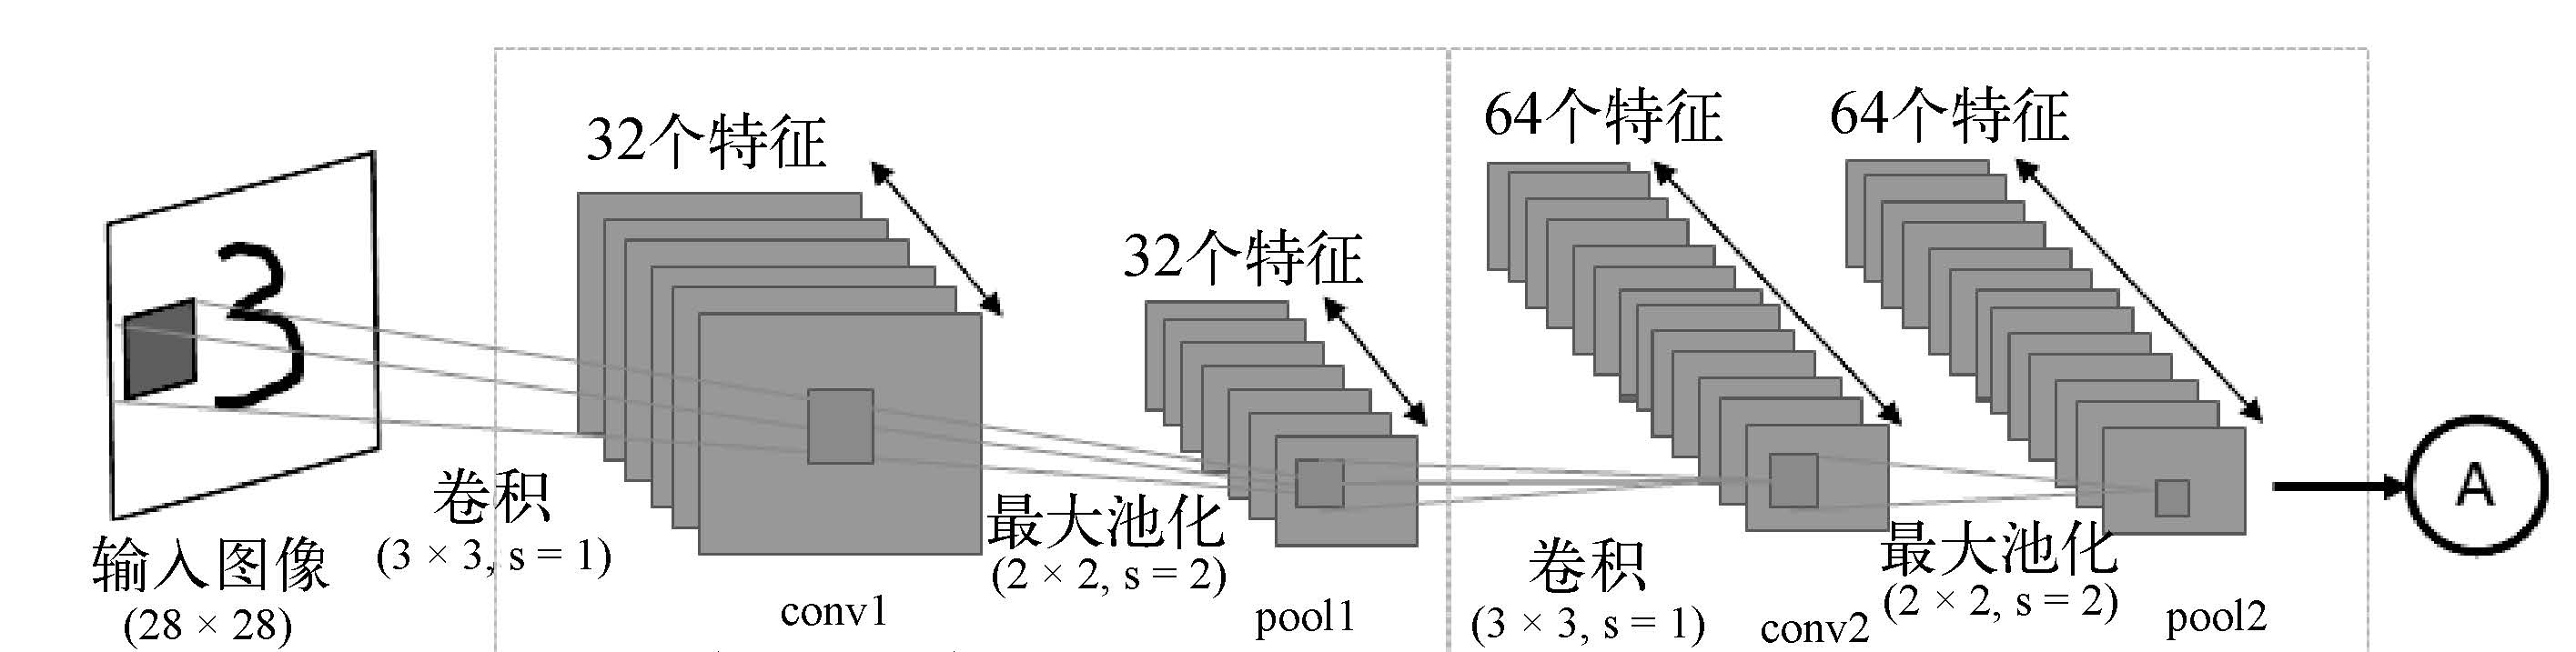
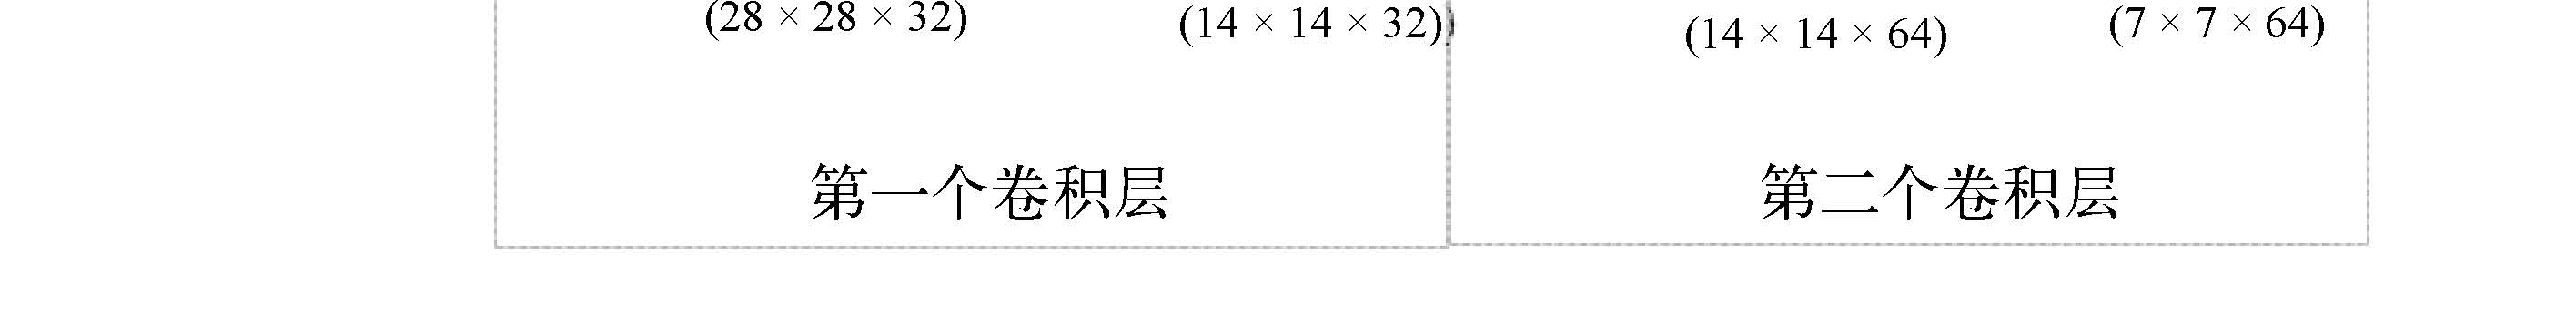

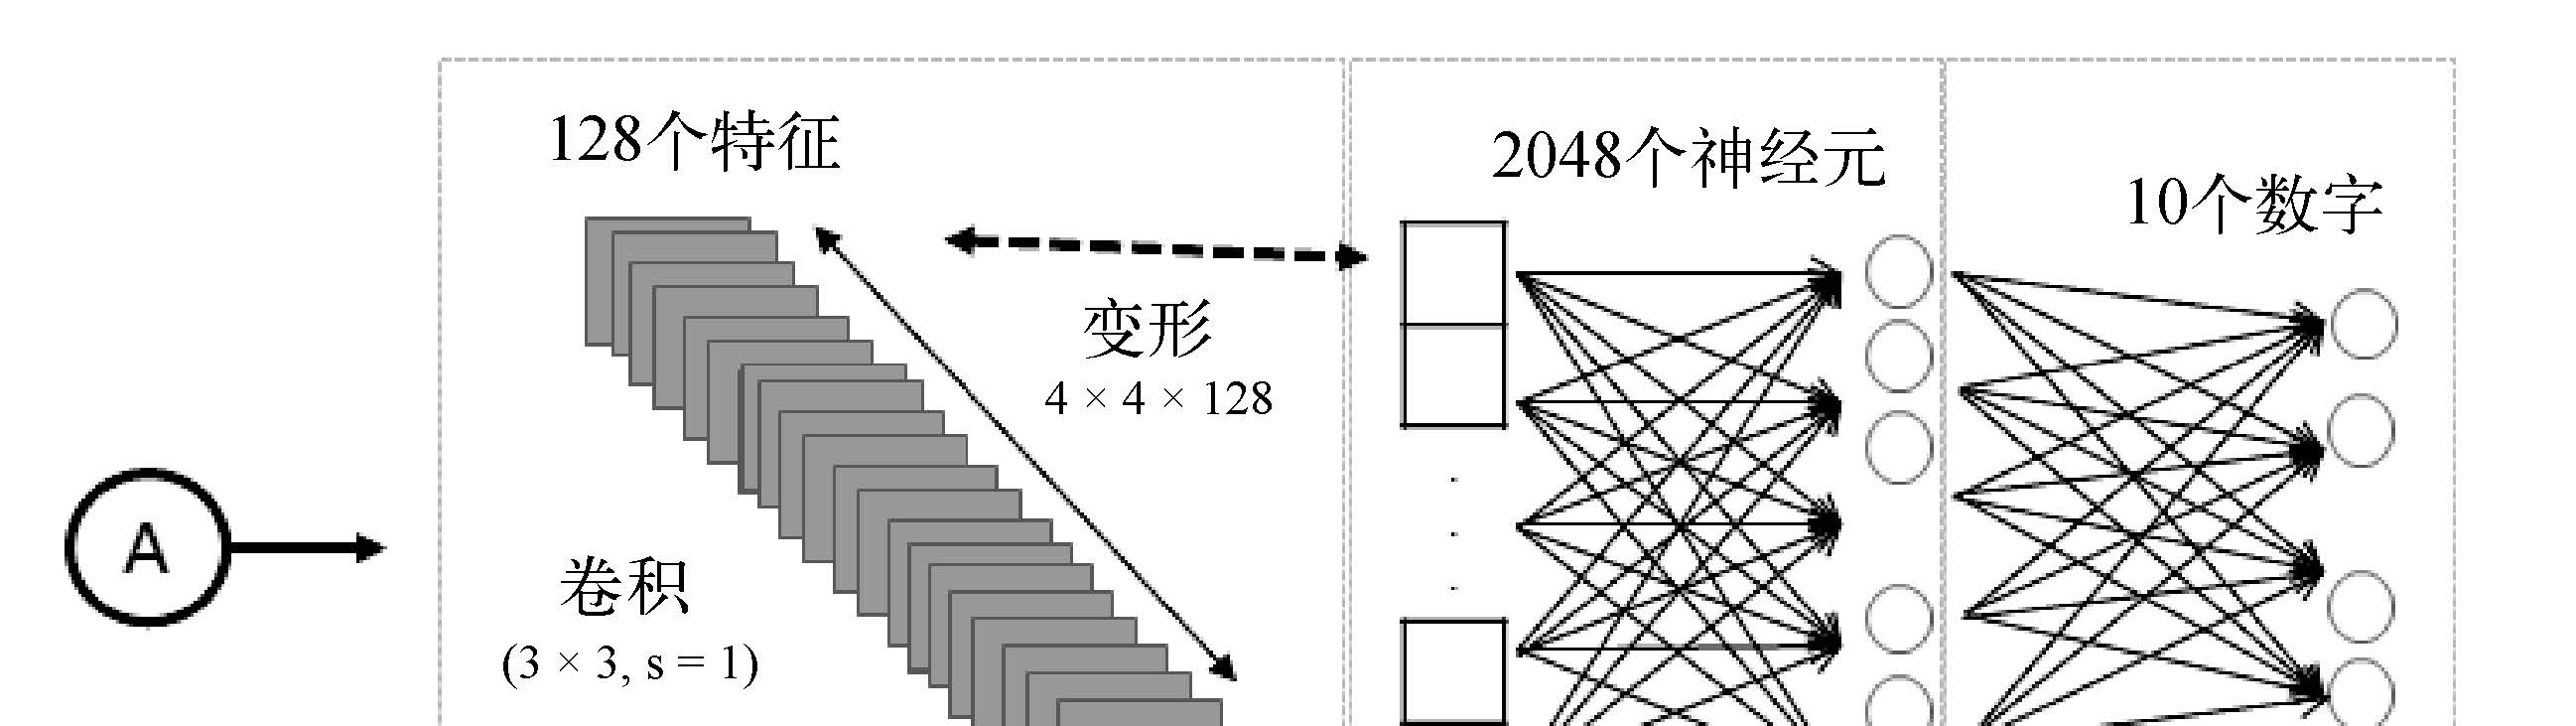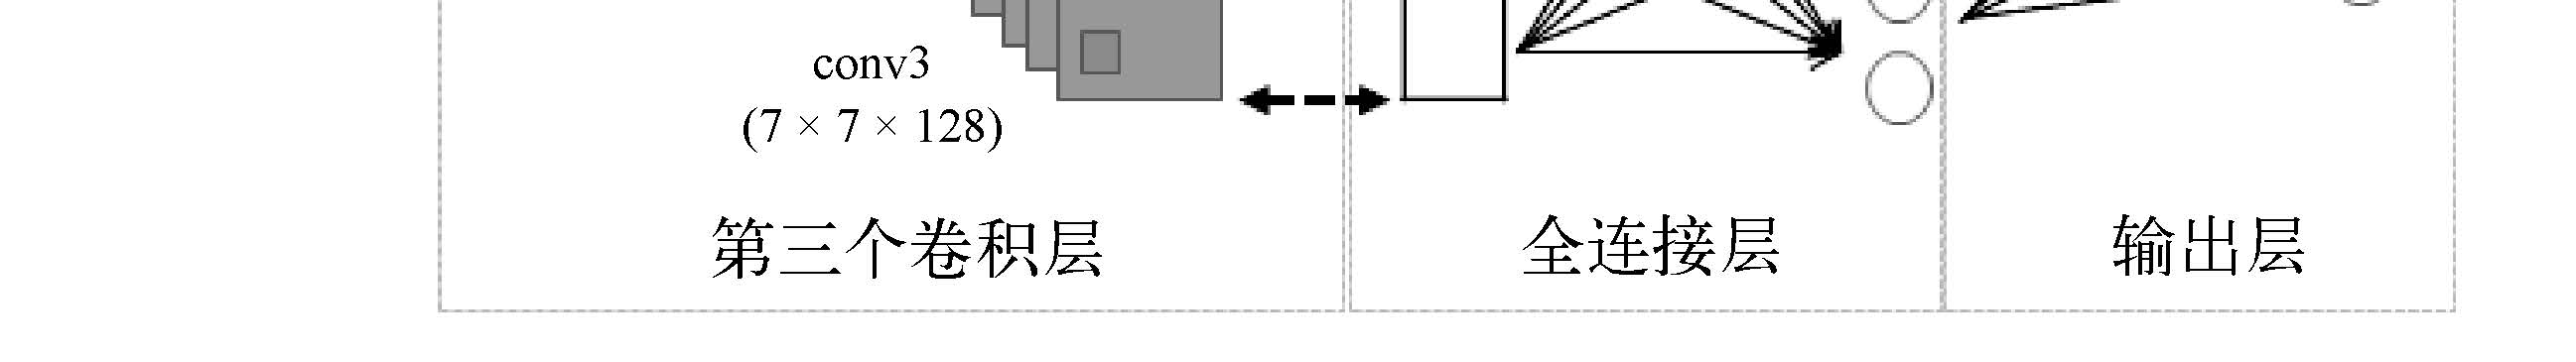

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

D:\Python\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
# 设置以下参数。两个参数分别表示训练阶段（128）和测试阶段（256）的样本数量：
batch_size = 128
test_size = 256

# 然后定义下面的参数。其值为28，因为MNIST图像的宽和高为28像素：
img_size = 28

# 考虑到类的数量，数值10表示我们为10个数字中的每一个都定义了一个类：
num_classes = 10

In [11]:
# 为输入图像定义占位符变量X。该张量的数据类型被设置为float32，
# 形状设置为[None,img_size, img_size, 1]。此处None表示该张量可以保存任意数量的图像：
X = tf.placeholder("float", [None, img_size, img_size, 1])

In [12]:
# 然后设置另一个占位符变量Y，表示每个输入到占位符变量X中的图像对应的真实类标签。
# 该占位符变量的形状为[None, num_classes]，代表该张量可以保存任意数量的标签，
# 且每个标签为长度num_classes的一个向量。此处num_classes取10：
Y = tf.placeholder("float", [None, num_classes])

In [13]:
# 然后导入mnist数据，数据会被复制到data文件夹：
mnist = input_data.read_data_sets("data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [14]:
# 建立数据集，对网络进行训练(trX, trY)和测试(teX, teY)：
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

CNN输入必须是图片的形状？

In [15]:
# trX和trY图像集必须根据输入形状进行变形：
trX = trX.reshape(-1, img_size, img_size, 1)
teX = teX.reshape(-1, img_size, img_size, 1)

现在，可以开始定义网络权重了。

In [16]:
# init_weights函数能构建给定形状的新变量，并初始化网络权重为随机值：
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

In [17]:
# 第一个卷积层中的每个神经元均由输入张量的一个小子集卷积而来，其维度为3 × 3 × 1。
# 数值32是这一层的特征图数量。因此，可以将权重w定义如下：
w = init_weights([3, 3, 1, 32])

In [18]:
# 输入的数量上升至32，也就是说，第二个卷积层中的每个神经元均由第一个卷积层中3 × 3 × 32个神经元卷积而来。
# 权重w2定义如下：
w2 = init_weights([3, 3, 32, 64])
# 数值64代表该层获得的输出特征数量。

In [19]:
# 第三个卷积层由前一层的3 × 3 × 64个神经元卷积而来，其输出特征数量为128：
w3 = init_weights([3, 3, 64, 128])

这边是怎么变成128 × 4 × 4的输入的？

In [20]:
# 第四层是一个全连接层。该层接收128 × 4 × 4的输入，输出数量为625：
w4 = init_weights([128 * 4 * 4, 625])

In [21]:
# 输出层接收625个输入，其输出为类的数量：
w_o = init_weights([625, num_classes])

In [22]:
# 注意，此处并没有完成数据初始化，它们只定义于TensorFlow图中：
p_keep_conv = tf.placeholder("float")
p_keep_hidden = tf.placeholder("float")

下面可以开始定义网络模型。根据前面对网络权重的定义，模型的实质是一个函数。

In [ ]:
# 该函数接收的输入为X张量、权重张量，以及卷积层和全连接层的dropout参数：
def model(X, w, w2, w3, w4, w_o, p_keep_conv, p_keep_hidden):

函数tf.nn.conv2d()负责执行TensorFlow的卷积操作。注意，对每个维度，其步长均设为1。

In [ ]:
# 实际上，第一维和最后一维的步长一定总为1，因为第一维代表图像数量，最后一维代表输入通道。
# 参数padding被设置为SAME，意为输入图像边界被0填充，以保证输出大小一致：
conv1 = tf.nn.conv2d(X, w, strides=[1, 1, 1, 1], padding='SAME')

In [ ]:
# 然后，将conv1层传递给一个relu层。这会计算每个输入像素x的max(x, 0)函数，为公式增添一些非线性，
# 使我们能够学习出更加复杂的函数：
conv1 = tf.nn.relu(conv1)

In [ ]:
# 接着，使用tf.nn.max_pool操作符对得出的结果层进行池化操作：
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], 
                       strides = [1, 2, 2, 1],
                       padding = 'SAME')

这是一个2 × 2最大池化操作，意为使用2 × 2的窗，选择每个窗中的最大值。然后移动两个像素，进入下一个窗继续该操作。

In [ ]:
# 为减小过拟合，使用tf.nn.dropout()函数，将conv1层和p_keep_conv概率值传入其中：
conv1 = tf.nn.dropout(conv1, p_keep_conv)

In [ ]:
# 可以看到，接下来的两个卷积层conv2和conv3，定义方式和conv1相同：
conv2 = tf.nn.conv2d(conv1, w2,
                     strides=[1, 1, 1, 1],
                     padding='SAME')
conv2 = tf.nn.relu(conv2)
conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1],
                       strides=[1, 2, 2, 1],
                       padding='SAME')
conv2 = tf.nn.dropout(conv2, p_keep_conv)

conv3 = tf.nn.conv2d(conv2, w3,
                     strides=[1, 1, 1, 1],
                     padding='SAME')
conv3 = tf.nn.relu(conv3)

In [ ]:
# 然后，向网络中添加两个全连接层FC_layer。第一个FC_layer的输入为前面一个卷积层：
FC_layer = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1],
                          padding='SAME')
FC_layer = tf.reshape(FC_layer,[-1,w4.get_shape().as_list()[0]])

# 再次使用dropout函数，减少过拟合：
FC_layer = tf.nn.dropout(FC_layer, p_keep_conv)

In [ ]:
# 输出层接收FC_layer作为输入，并接收权重张量w4。同时，分别应用relu和dropout操作符：
output_layer = tf.nn.relu(tf.matmul(FC_layer, w4))
output_layer = tf.nn.dropout(output_layer, p_keep_hidden)

In [ ]:
# 变量result是一个长度为10的向量，用于确定输入图像属于10个类中的哪一个：
result = tf.matmul(output_layer, w_o)
return result

这一分类器中使用**交叉熵**作为评价指标。交叉熵是一个连续函数，其值总为正。如果预测输出等于期望输出，那么交叉熵的值为0。因此，优化的目标是通过调整网络参数最小化交叉熵，使其尽量接近0。

In [ ]:
# TensorFlow内置计算交叉熵的函数。注意，该函数内已计算softmax，所以必须直接使用py_x的输出：
py_x = model(X, w, w2, w3, w4, w_o, p_keep_conv, p_keep_hidden)
Y_ = tf.nn.softmax_cross_entropy_with_logits(logits=py_x, labels=Y)

现在，我们已经为每个分好类的图像定义了交叉熵，所以具备指标，可以评价模型在每个独立图像上的表现。但若要用交叉熵指导网络参数的优化，还需要一个张量值。因此，简单地为所有分类好的图像的交叉熵取均值：

In [ ]:
cost = tf.reduce_mean(Y_)

为最小化上述代价函数，我们需要定义一个优化器。在这个例子中，采用已实现的RMSProp Optimizer函数。该函数为梯度下降的一个高级形式。

In [ ]:
# RMSPropOptimizer函数用指数级衰减的梯度平方均值去除学习率。
# 辛顿建议将衰减参数设置为0.9，而比较好的学习率默认值为0.001：
optimizer = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)

**本质上，常见的梯度下降算法存在一个问题：学习率必须具有1/T的规模才能收敛。此处的T为迭代次数。RMSProp弥补了这一缺陷，因为它会自动调整步长，使其与梯度具有相同规模。随着平均梯度变小，SGD的更新系数会变大以进行弥补。**

In [ ]:
# 最后定义predict_op，它是模型的几个输出维度中最大值的索引：
predict_op = tf.argmax(py_x, 1)

注意，此时还没有进行优化操作。程序还没有进行任何计算，我们只是将优化器对象添加到TensorFlow图中以便随后执行。

现在开始定义网络的运行会话：训练集含有55 000个图像，所以使用所有这些图像计算模型的梯度会耗时很长。因此，在优化器的每轮迭代中，我们只使用这些图像中的一小批。如果计算机运行过程中由于内存不足而死机，或运行很慢，你可以试着降低每一批的图像数量，但同时可能需要增加迭代次数。

In [ ]:
# 现在，可以定义TensorFlow会话了：
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):

In [ ]:
# 取一批训练样本，此时training_batch张量包含图像的一个子集及其对应标签：
training_batch = zip(range(0, len(trX), batch_size),
                     range(batch_size, len(trX)+1, batch_size))

在图中取合适的占位符变量名，将这批数据馈给feed_dict。现在，用这批训练数据运行优化器，TensorFlow便会将数据的值传入占位符变量，并启动优化器：

In [ ]:
for start, end in training_batch:
    sess.run(optimizer, feed_dict={X: trX[start:end],\
                                   Y: trY[start:end],\
                                   p_keep_conv: 0.8,\
                                   p_keep_hidden: 0.5})

In [ ]:
# 同时，我们获得了可以滚动变化的一批样本：
test_indices = np.arange(len(teX))
np.random.shuffle(test_indices)
test_indices = test_indices[0:test_size]

In [ ]:
# 对每一轮迭代，显示模型在该批数据集上的准确率：
print(i, np.mean(np.argmax(teY[test_indices], axis=1) ==\
                 sess.run(predict_op,
                          feed_dict={X: teX[test_indices],
                                     Y: teY[test_indices],
                                     p_keep_conv: 1.0,
                                     p_keep_hidden: 1.0})))

In [1]:
# 完整代码
import tensorflow as tf
import numpy as np
#import mnist_data 

batch_size = 128
test_size = 256
img_size = 28
num_classes = 10

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def model(X, w, w2, w3, w4, w_o, p_keep_conv, p_keep_hidden):

    conv1 = tf.nn.conv2d(X, w,\
                         strides=[1, 1, 1, 1],\
                         padding='SAME')

    conv1_a = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1_a, ksize=[1, 2, 2, 1]\
                        ,strides=[1, 2, 2, 1],\
                        padding='SAME')
    conv1 = tf.nn.dropout(conv1, p_keep_conv)

    conv2 = tf.nn.conv2d(conv1, w2,\
                         strides=[1, 1, 1, 1],\
                         padding='SAME')
    conv2_a = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2_a, ksize=[1, 2, 2, 1],\
                        strides=[1, 2, 2, 1],\
                        padding='SAME')
    conv2 = tf.nn.dropout(conv2, p_keep_conv)

    conv3=tf.nn.conv2d(conv2, w3,\
                       strides=[1, 1, 1, 1]\
                       ,padding='SAME')

    conv3 = tf.nn.relu(conv3)


    FC_layer = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1],\
                        strides=[1, 2, 2, 1],\
                        padding='SAME')
    
    FC_layer = tf.reshape(FC_layer, [-1, w4.get_shape().as_list()[0]])    
    FC_layer = tf.nn.dropout(FC_layer, p_keep_conv)


    output_layer = tf.nn.relu(tf.matmul(FC_layer, w4))
    output_layer = tf.nn.dropout(output_layer, p_keep_hidden)

    result = tf.matmul(output_layer, w_o)
    return result


#mnist = mnist_data.read_data_sets("ata/")
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data", one_hot=True)

trX, trY, teX, teY = mnist.train.images,\
                     mnist.train.labels, \
                     mnist.test.images, \
                     mnist.test.labels

trX = trX.reshape(-1, img_size, img_size, 1)  # 28x28x1 input img
teX = teX.reshape(-1, img_size, img_size, 1)  # 28x28x1 input img

X = tf.placeholder("float", [None, img_size, img_size, 1])
Y = tf.placeholder("float", [None, num_classes])

w = init_weights([3, 3, 1, 32])       # 3x3x1 conv, 32 outputs
w2 = init_weights([3, 3, 32, 64])     # 3x3x32 conv, 64 outputs
w3 = init_weights([3, 3, 64, 128])    # 3x3x32 conv, 128 outputs
w4 = init_weights([128 * 4 * 4, 625]) # FC 128 * 4 * 4 inputs, 625 outputs
w_o = init_weights([625, num_classes])         # FC 625 inputs, 10 outputs (labels)

p_keep_conv = tf.placeholder("float")
p_keep_hidden = tf.placeholder("float")
py_x = model(X, w, w2, w3, w4, w_o, p_keep_conv, p_keep_hidden)

Y_ = tf.nn.softmax_cross_entropy_with_logits(logits=py_x, labels=Y)
cost = tf.reduce_mean(Y_)
optimizer  = tf.train.\
           RMSPropOptimizer(0.001, 0.9).minimize(cost)
predict_op = tf.argmax(py_x, 1)

with tf.Session() as sess:
    #tf.initialize_all_variables().run()
    tf.global_variables_initializer().run()
    for i in range(100):
        training_batch = \
                       zip(range(0, len(trX), \
                                 batch_size),
                             range(batch_size, \
                                   len(trX)+1, \
                                   batch_size))
        for start, end in training_batch:
            sess.run(optimizer, feed_dict={X: trX[start:end],\
                                          Y: trY[start:end],\
                                          p_keep_conv: 0.8,\
                                          p_keep_hidden: 0.5})

        test_indices = np.arange(len(teX))# Get A Test Batch
        np.random.shuffle(test_indices)
        test_indices = test_indices[0:test_size]

        print(i, np.mean(np.argmax(teY[test_indices], axis=1) ==\
                         sess.run\
                         (predict_op,\
                          feed_dict={X: teX[test_indices],\
                                     Y: teY[test_indices], \
                                     p_keep_conv: 1.0,\
                                     p_keep_hidden: 1.0})))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

0 0.97265625
1 0.97265625
2 0.98046875
3 0.984375
4 0.9921875
5 0.98046875
6 0.984375
7 0.984375
8 0.99609375
9 0.99609375
10 1.0
11 